In [ ]:
#установка библиотек
# !pip install psycopg2
# !pip install plotly

In [33]:
#проверка подключения PostgreSQL 
import psycopg2
import pandas as pd
import numpy as np
#Библиотека для визуализации
from IPython.display import HTML
import plotly.express as px

#!введите свои реквизиты!
DB_HOST = '52.157.159.24'
DB_USER = 'student22'
DB_USER_PASSWORD = 'student22_password'
DB_NAME = 'sql_ex_for_student22'

conn = psycopg2.connect(host=DB_HOST, user=DB_USER, password=DB_USER_PASSWORD, dbname=DB_NAME)

In [34]:
#join по таблицам laptop & product
request = """
select * from distribution_by_type
"""
df = pd.read_sql_query(request, conn)
df

maker     type        prc
0     A   Laptop  50.000000
1     B   Laptop  25.000000
2     C   Laptop  25.000000
3     A       PC  22.222222
4     B       PC  11.111111
5     E       PC  66.666667
6     A  Printer  50.000000
7     D  Printer  33.333333
8     E  Printer  16.666667

[None, Text(0.5, 1.0, 'Диаграмма продуктов по производителям')]

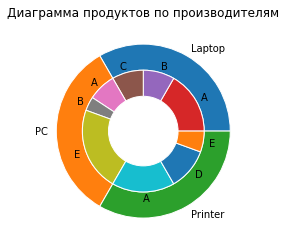

In [49]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.pie(df.groupby('type')['prc'].sum(), radius=1, labels=df['type'].drop_duplicates(),
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(df['prc'], radius=1-size, labels=df['maker'],
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Диаграмма продуктов по производителям')